<a href="https://colab.research.google.com/github/BaptisteFra802/TP_IA/blob/main/Random_forest_Ethan_rawData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Précision :  0.6053811659192825


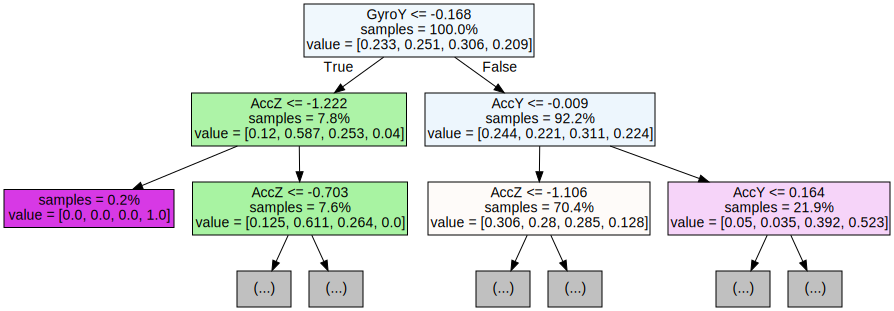

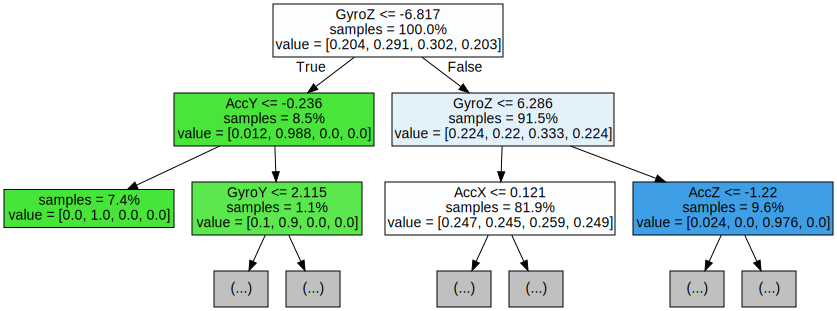

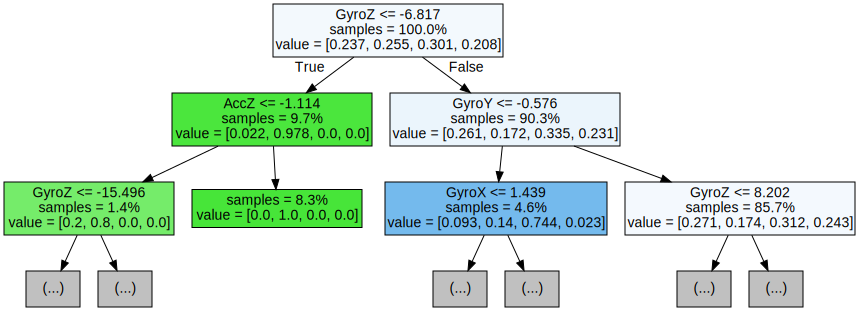

In [7]:
# Traitement des données
import pandas as pd
import numpy as np

# Création du modèle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Visualisation des réultats
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

d=pd.read_csv("sensor_raw.csv");
# Sépare le résultat (target) des infos renvoyées par le capteur
X = d.drop('Target(Class)', axis=1)
y = d['Target(Class)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#entrainement d'un modèle random forest sur le dataset d'entrainement
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#on utilise le modèle sur le dataset de test, on stocke le résultat de ses prédictions dans y_pred
y_pred = rf.predict(X_test)

#on affiche la précision des prédictions par rapport aux class connus de l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print("Précision : ", accuracy)

#affichage des trois premier arbres de décision de la forêt
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
